In [1]:
import pandas as pd
import numpy as np


from coactivation.process import preprocess_emgs, get_coactivation_map, emgs, mirror_left_right_emgs, get_coactivation_difference
from coactivation.visualize import visualize_emgs, plot_coactivation_map, plot_one_class_coactivation_map

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
from scipy.spatial.distance import cdist, jensenshannon, pdist
from sklearn.manifold import TSNE

from scipy.spatial.distance import cdist, pdist, squareform
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from matplotlib.colors import LinearSegmentedColormap

#  1. 200 Hz: plot just negative, then just positive

## from last week

(0.0, 2.0)

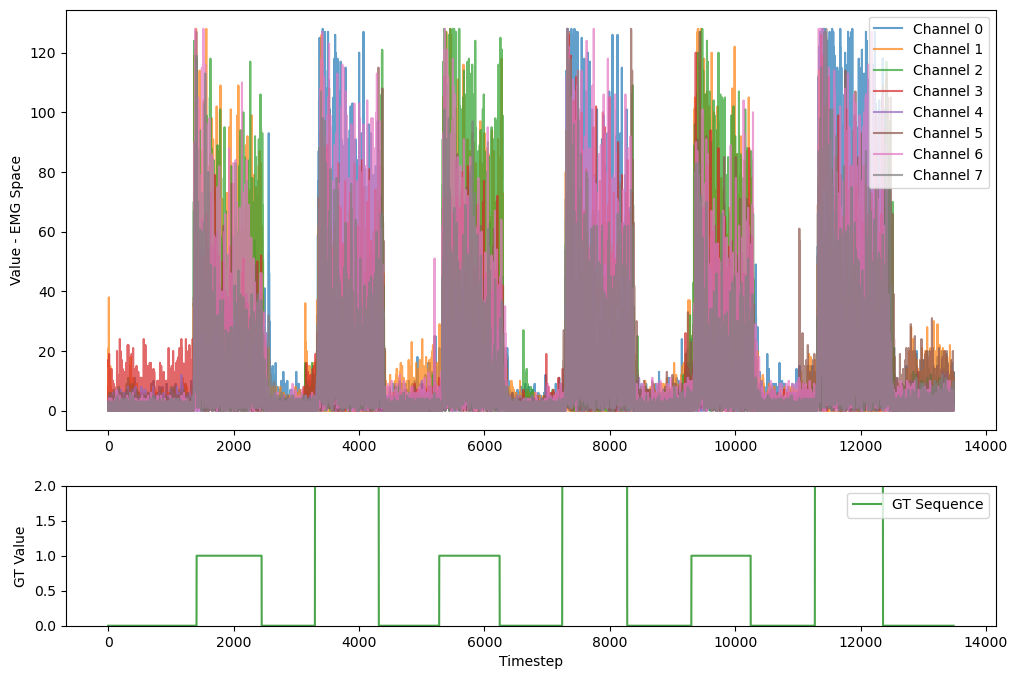

In [2]:
df200 = pd.read_csv('data_200hz/runsheng_new_200hz.csv')
df200 = np.abs(df200)

# Adjust figure size and use gridspec for uneven subplot heights
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
# EMG Signals 
gt_sequence = df200['gt']
df200_emgs = df200[emgs]
for channel in range(8):
    axs[0].plot(df200_emgs[emgs[channel]], label=f'Channel {channel}', alpha=0.7)
axs[0].set_ylabel('Value - EMG Space')
axs[0].legend(loc='upper right')
# GT Sequence
axs[1].plot(gt_sequence, label='GT Sequence', color='green', alpha=0.7)
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('GT Value')
axs[1].legend(loc='upper right')
axs[1].set_ylim(0, 2)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.023438,0.015625,0.015625,0.015625,0.015625,0.007812,0.007812
1,0.078125,0.187500,0.218750,0.093750,0.054688,0.093750,0.117188,0.070312
2,0.265625,0.015625,0.093750,0.117188,0.070312,0.101562,0.195312,0.125000


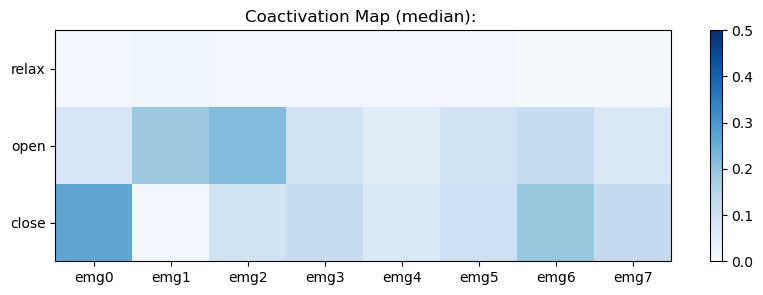

In [3]:
df200_preprocessed = preprocess_emgs('data_200hz/runsheng_new_200hz.csv', 200)
display(get_coactivation_map(df200_preprocessed))
plot_coactivation_map(get_coactivation_map(df200_preprocessed))

(0.0, 2.0)

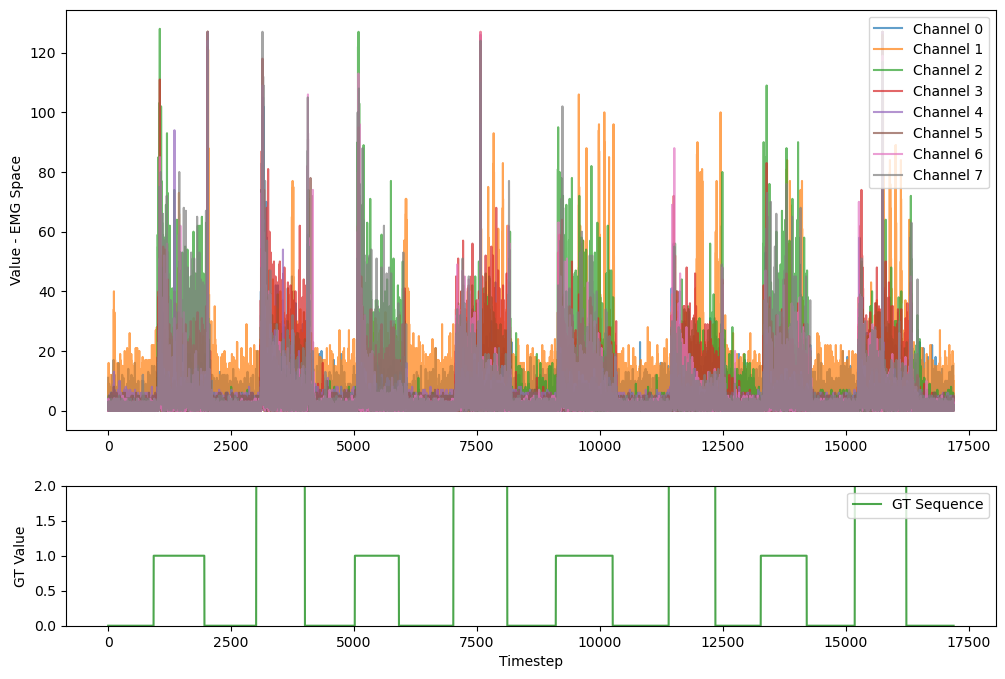

In [4]:
df200 = pd.read_csv('data_200hz/yolanda_new_200hz.csv')
df200 = np.abs(df200)

# Adjust figure size and use gridspec for uneven subplot heights
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
# EMG Signals 
gt_sequence = df200['gt']
df200_emgs = df200[emgs]
for channel in range(8):
    axs[0].plot(df200_emgs[emgs[channel]], label=f'Channel {channel}', alpha=0.7)
axs[0].set_ylabel('Value - EMG Space')
axs[0].legend(loc='upper right')
# GT Sequence
axs[1].plot(gt_sequence, label='GT Sequence', color='green', alpha=0.7)
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('GT Value')
axs[1].legend(loc='upper right')
axs[1].set_ylim(0, 2)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.046875,0.015625,0.007812,0.015625,0.007812,0.007812,0.007812
1,0.031250,0.054688,0.085938,0.046875,0.015625,0.015625,0.023438,0.046875
2,0.046875,0.062500,0.054688,0.062500,0.023438,0.023438,0.031250,0.039062


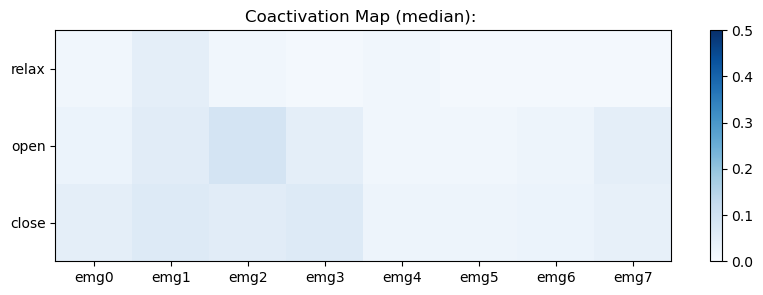

In [5]:
df200_preprocessed = preprocess_emgs('data_200hz/yolanda_new_200hz.csv', 200)
display(get_coactivation_map(df200_preprocessed))
plot_coactivation_map(get_coactivation_map(df200_preprocessed))

## split data into positive and negative

In [6]:
df_runsheng = pd.read_csv('data_200hz/runsheng_new_200hz.csv')
df_runsheng_pos = df_runsheng.copy()
df_runsheng_pos[emgs] = df_runsheng[emgs][df_runsheng[emgs] > 0]
df_runsheng_neg = df_runsheng.copy()
df_runsheng_neg[emgs] = df_runsheng[emgs][df_runsheng[emgs] < 0]
df_runsheng_pos.to_csv('data_200hz/runsheng_new_200hz_pos.csv')
df_runsheng_neg.to_csv('data_200hz/runsheng_new_200hz_neg.csv')

df_yolanda = pd.read_csv('data_200hz/yolanda_new_200hz.csv')
df_yolanda_pos = df_yolanda.copy()
df_yolanda_pos[emgs] = df_yolanda[emgs][df_yolanda[emgs] > 0]
df_yolanda_neg = df_yolanda.copy()
df_yolanda_neg[emgs] = df_yolanda[emgs][df_yolanda[emgs] < 0]
df_yolanda_pos.to_csv('data_200hz/yolanda_new_200hz_pos.csv')
df_yolanda_neg.to_csv('data_200hz/yolanda_new_200hz_neg.csv')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.054688,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812
1,0.031250,0.062500,0.085938,0.046875,0.015625,0.015625,0.031250,0.054688
2,0.046875,0.070312,0.054688,0.070312,0.023438,0.023438,0.031250,0.039062


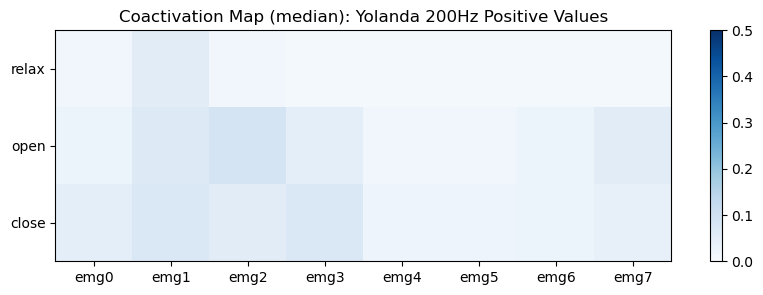

In [7]:
df200_preprocessed = preprocess_emgs('data_200hz/yolanda_new_200hz_pos.csv', 200)
cm_yolanda_pos = get_coactivation_map(df200_preprocessed)
display(cm_yolanda_pos)
plot_coactivation_map(cm_yolanda_pos, title='Yolanda 200Hz Positive Values')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.023438,0.039062,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625
1,0.031250,0.054688,0.093750,0.050781,0.023438,0.023438,0.031250,0.054688
2,0.054688,0.062500,0.054688,0.070312,0.031250,0.023438,0.031250,0.039062


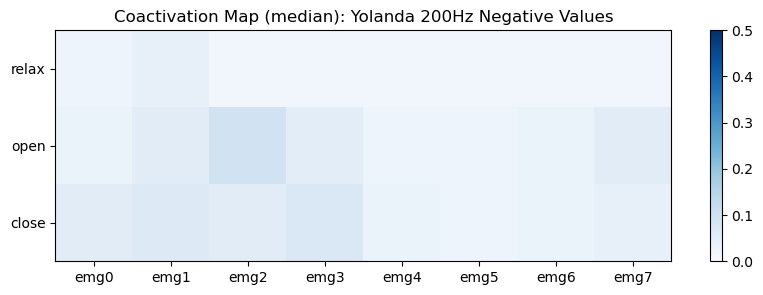

In [8]:
df200_preprocessed = preprocess_emgs('data_200hz/yolanda_new_200hz_neg.csv', 200)
cm_yolanda_neg = get_coactivation_map(df200_preprocessed)
display(cm_yolanda_neg)
plot_coactivation_map(cm_yolanda_neg, title='Yolanda 200Hz Negative Values')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.007812
1,0.070312,0.195312,0.234375,0.093750,0.054688,0.093750,0.117188,0.074219
2,0.273438,0.015625,0.093750,0.125000,0.078125,0.101562,0.203125,0.132812


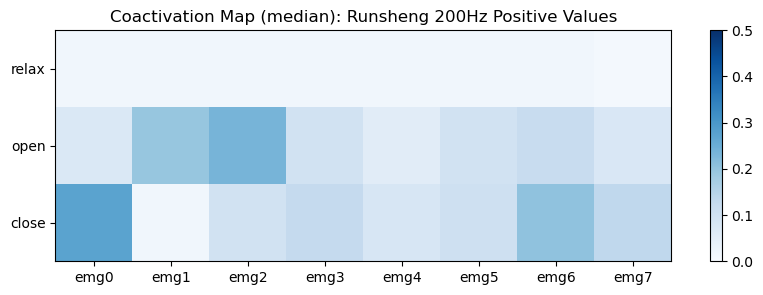

In [9]:
df200_preprocessed = preprocess_emgs('data_200hz/runsheng_new_200hz_pos.csv', 200)
cm_runsheng_pos = get_coactivation_map(df200_preprocessed)
display(cm_runsheng_pos)
plot_coactivation_map(cm_runsheng_pos, title='Runsheng 200Hz Positive Values')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.023438,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625
1,0.082031,0.195312,0.218750,0.101562,0.054688,0.093750,0.117188,0.070312
2,0.265625,0.023438,0.093750,0.125000,0.078125,0.101562,0.195312,0.125000


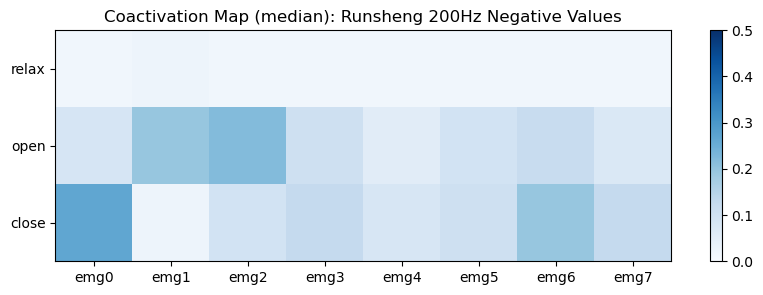

In [10]:
df200_preprocessed = preprocess_emgs('data_200hz/runsheng_new_200hz_neg.csv', 200)
cm_runsheng_neg = get_coactivation_map(df200_preprocessed)
display(cm_runsheng_neg)
plot_coactivation_map(cm_runsheng_neg, title='Runsheng 200Hz Negative Values')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,-0.007812,0.015625,0.000000,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812
1,0.000000,0.007812,-0.007812,-0.003906,-0.007812,-0.007812,0.000000,0.000000
2,-0.007812,0.007812,0.000000,0.000000,-0.007812,0.000000,0.000000,0.000000


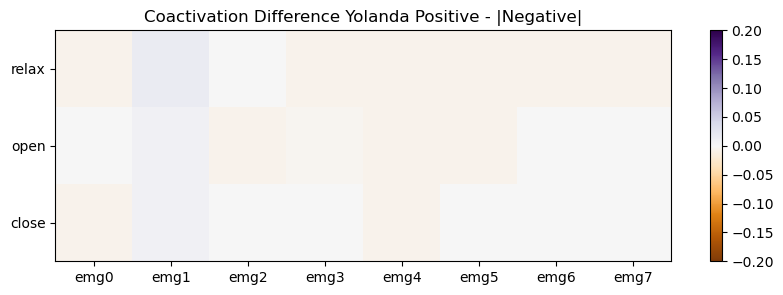

In [11]:
get_coactivation_difference(cm_yolanda_pos, cm_yolanda_neg, title='Yolanda Positive - |Negative|')


emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.000000,-0.007812,0.000000,0.000000,0.0,0.0,0.000000,-0.007812
1,-0.011719,0.000000,0.015625,-0.007812,0.0,0.0,0.000000,0.003906
2,0.007812,-0.007812,0.000000,0.000000,0.0,0.0,0.007812,0.007812


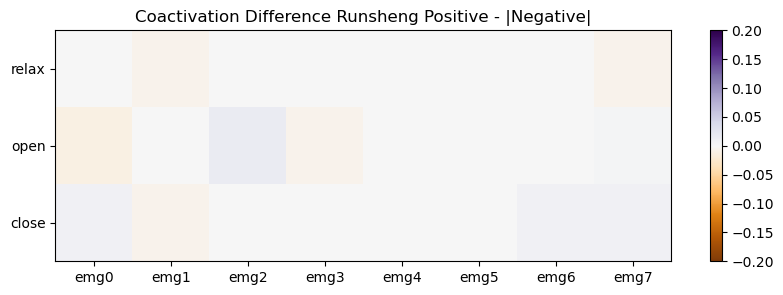

In [12]:
get_coactivation_difference(cm_runsheng_pos, cm_runsheng_neg, title = 'Runsheng Positive - |Negative|')

#### No apparent difference between positive and negative raw EMG values

# 2. Variance of clusters


In [13]:
df = pd.read_csv('coactivations_by_gt.csv', index_col=0)
df = mirror_left_right_emgs(df)
df = mirror_left_right_emgs(df, 'subject_id', 'ae')
df

,date,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,gt,hand,is_patient,n,subject_id,window
0,2023_10_16,0.032702,0.034722,0.020488,0.033537,0.094421,0.151724,0.112426,0.076923,0,left,False,11,fa,0
1,2023_10_16,0.125645,0.333333,0.195122,0.112805,0.154506,0.200000,0.147929,0.115385,1,left,False,11,fa,1
2,2023_10_16,0.049914,0.050347,0.023415,0.032012,0.090129,0.144828,0.112426,0.073077,0,left,False,11,fa,2
3,2023_10_16,0.327022,0.361111,0.139512,0.309451,0.278970,0.241379,0.213018,0.246154,2,left,False,11,fa,3
4,2023_10_16,0.032702,0.032986,0.021463,0.032012,0.090129,0.144828,0.112426,0.076923,0,left,False,11,fa,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2023_11_03,0.021898,0.043651,0.029326,0.188759,0.164430,0.205674,0.034301,0.016874,0,right,False,13,is,8
1552,2023_11_03,0.059437,0.347222,0.593353,0.635207,0.204698,0.262411,0.048813,0.135435,1,right,False,13,is,9
1553,2023_11_03,0.021898,0.043651,0.030792,0.147402,0.137584,0.226950,0.038259,0.017762,0,right,False,13,is,10
1554,2023_11_03,0.423879,0.351190,0.046921,0.290562,0.281879,0.304965,0.248021,0.325044,2,right,False,13,is,11


In [14]:
df_healthy = df[df.is_patient==False]

In [15]:
X = df_healthy[emgs].to_numpy()

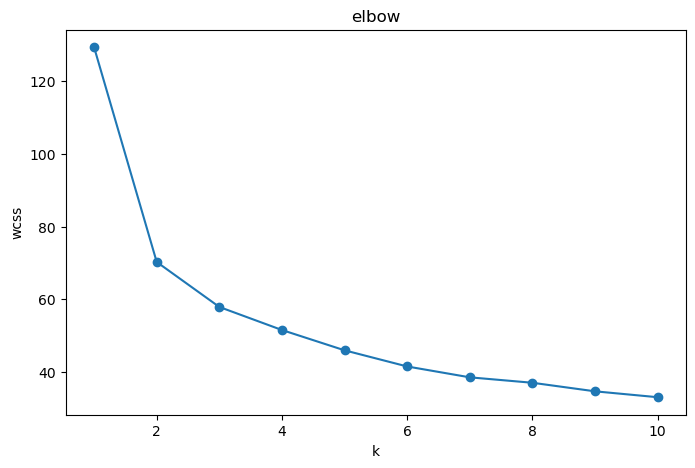

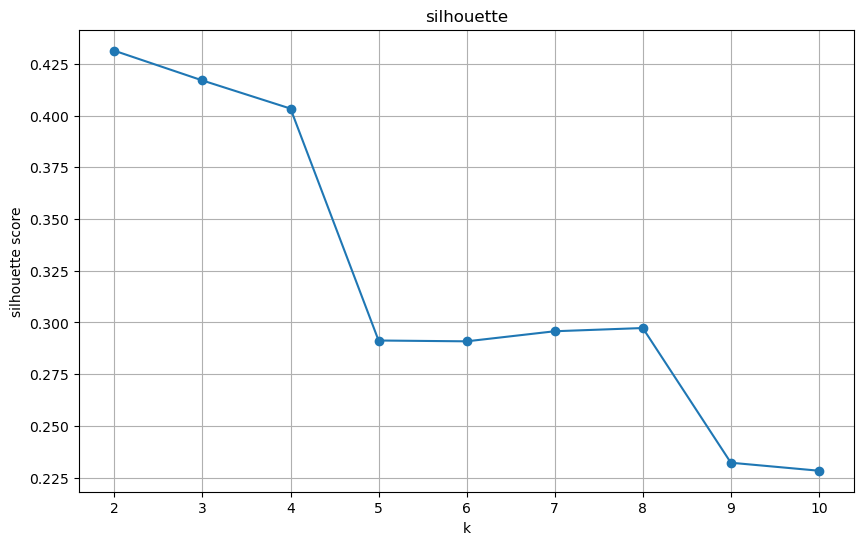

In [16]:
# elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('elbow')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('silhouette')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [65]:
kmeans = KMeans(n_clusters=3,         # Number of clusters
                 init='k-means++',    # Centroid initialization
                 max_iter=300,        # Maximum iterations
                 n_init=10,           # Number of initializations
                 tol=1e-4,    
                 random_state=42,    
                 algorithm='lloyd')
df_healthy['cluster'] = kmeans.fit_predict(X)
kmeans.fit(X)

labels = kmeans.predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[0.26479525 0.28122292 0.23433115 0.31544375 0.31176527 0.31230406
  0.31120539 0.2716166 ]
 [0.04786413 0.10322307 0.06485868 0.07342121 0.13451815 0.14390848
  0.07599987 0.04803217]
 [0.09157615 0.29008351 0.43884285 0.28409736 0.24493469 0.2121183
  0.12774786 0.17697704]]


/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_93173/3146756214.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
color_map = {
    "0": "red",   
    "1": "blue",   
    "2": "green",  
    # "3": "purple" 
}

# switch cluster to match relax 0 open 1 close 2 gt
cluster_map = {0:2, 1:0, 2:1}
df_healthy.loc[:, 'cluster'] = df_healthy['cluster'].map(cluster_map).astype("int32")

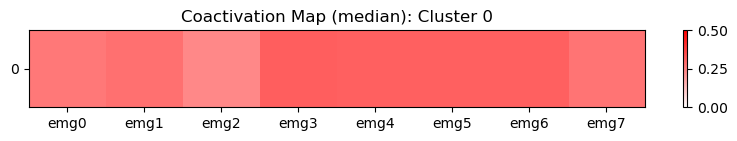

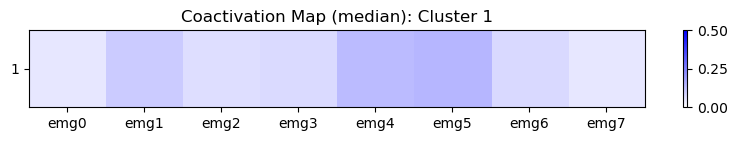

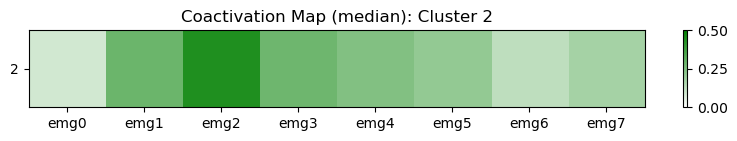

In [54]:
for i in range(len(kmeans.cluster_centers_)):
    cmap = LinearSegmentedColormap.from_list("white_to_color", ["white", color_map[str(i)]])
    cluster_center = kmeans.cluster_centers_[i]
    plot_one_class_coactivation_map(cluster_center, title='Cluster ' + str(i), label=i, cmap=cmap)

In [69]:
tsne_input = df_healthy[emgs].to_numpy()
data_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)
data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy'])
data_tsne['cluster_ids'] = df_healthy['cluster'].to_numpy().astype(str)
data_tsne['subject_ids'] = df_healthy['subject_id'].to_numpy()

unique_clusters = sorted(data_tsne['cluster_ids'].unique())
# palette = px.colors.qualitative.Plotly 


# color_map = {str(cluster): palette[i % len(palette)] for i, cluster in enumerate(unique_clusters)}

fig = px.scatter(data_tsne,
                    x='myx', y='myy', 
                    color='cluster_ids',
                    text='subject_ids',
                    title='Healthy 2D t-SNE for K-means', 
                    color_discrete_map=color_map,
                    category_orders={'cluster_ids': unique_clusters},
                    
)
fig.update_layout(
    legend=dict(
        x=1.15,
        y=0.5, 
        xanchor='left',
        yanchor='middle' 
    )
)

fig.show()
fig.write_html('test.html')

In [56]:
tsne_input = df_healthy[emgs].to_numpy()
data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)
data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])
data_tsne['cluster_ids'] = df_healthy['cluster'].to_numpy().astype(str)
data_tsne['subject_ids'] = df_healthy['subject_id'].to_numpy()

unique_clusters = sorted(data_tsne['cluster_ids'].unique())
# palette = px.colors.qualitative.Plotly 


# color_map = {str(cluster): palette[i % len(palette)] for i, cluster in enumerate(unique_clusters)}

fig = px.scatter_3d(data_tsne,
                    x='myx', y='myy', z='myz',
                    color='cluster_ids',
                    text='subject_ids',
                    title='Healthy 3D t-SNE for K-means', 
                    color_discrete_map=color_map,
                    category_orders={'cluster_ids': unique_clusters},
                    
)
fig.update_layout(
    legend=dict(
        x=1.15,
        y=0.5, 
        xanchor='left',
        yanchor='middle' 
    )
)

fig.show()
fig.write_html('relax.html')

## relax cluster

In [71]:
df_healthy[df_healthy.cluster==0].iloc[:,1:9].apply('var', axis=0)

emg0    0.002616
emg1    0.010763
emg2    0.003529
emg3    0.003186
emg4    0.002803
emg5    0.005620
emg6    0.004008
emg7    0.001624
dtype: float64

In [72]:
df_healthy[df_healthy.cluster==1].iloc[:,1:9].apply('var', axis=0)

emg0    0.005177
emg1    0.014840
emg2    0.015459
emg3    0.012395
emg4    0.006637
emg5    0.007518
emg6    0.008480
emg7    0.025486
dtype: float64

In [73]:
df_healthy[df_healthy.cluster==1].iloc[:,1:9].apply('var', axis=0)

emg0    0.005177
emg1    0.014840
emg2    0.015459
emg3    0.012395
emg4    0.006637
emg5    0.007518
emg6    0.008480
emg7    0.025486
dtype: float64

# 3. Case Studies Confusion Matrices

### Healthy on healthy clustering model

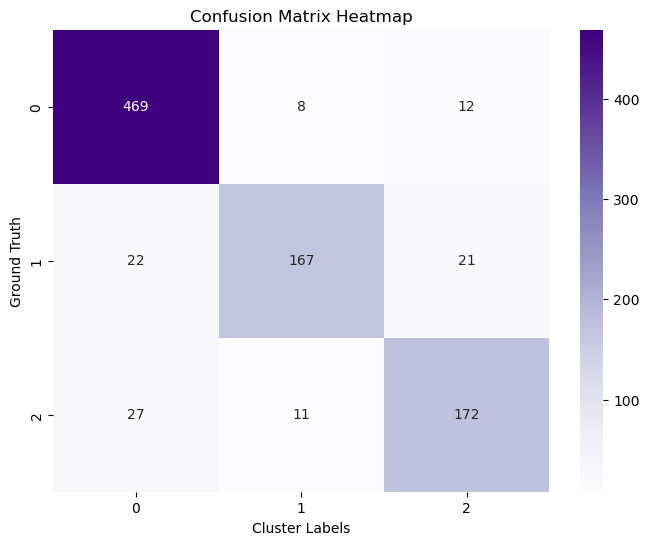

In [70]:
conf_matrix = confusion_matrix(df_healthy['gt'], df_healthy['cluster'])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix Heatmap')
plt.show()

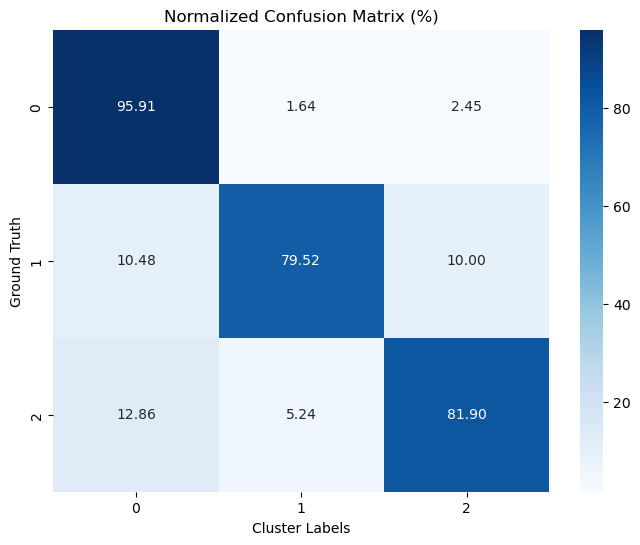

In [24]:
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title('Normalized Confusion Matrix (%)')
plt.show()

### Stroke on healthy clustering model

In [83]:
df_patient = df[df.is_patient==True]
df_patient['cluster'] = kmeans.fit_predict(df_patient[emgs])
df_patient['cluster'] = df_patient['cluster'].map(cluster_map).astype("int32")

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_93173/589224482.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_93173/589224482.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



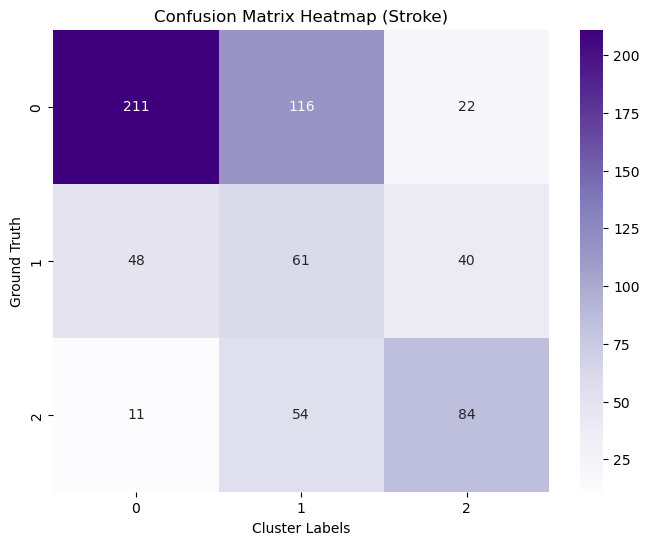

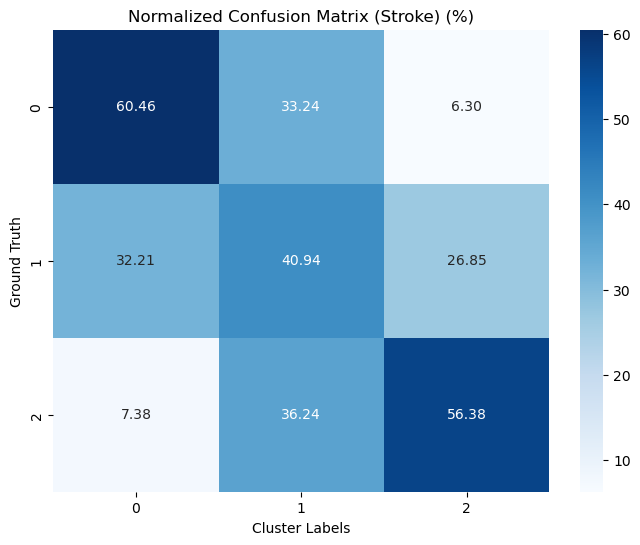

In [84]:
conf_matrix = confusion_matrix(df_patient['gt'], df_patient['cluster'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix Heatmap (Stroke)')
plt.show()

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title('Normalized Confusion Matrix (Stroke) (%)')
plt.show()

## P8

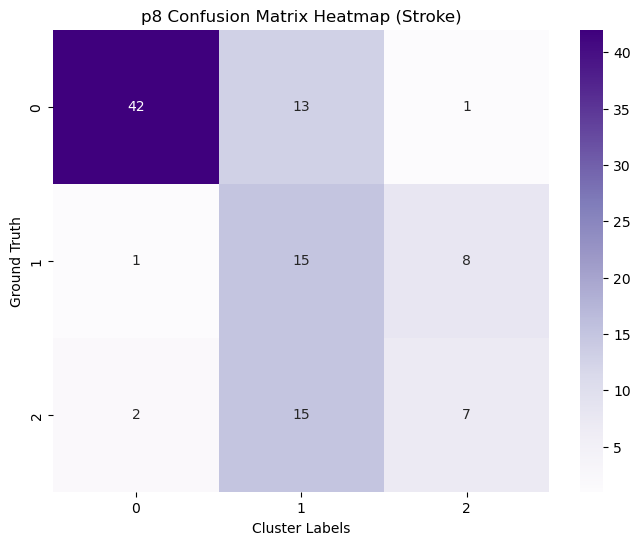

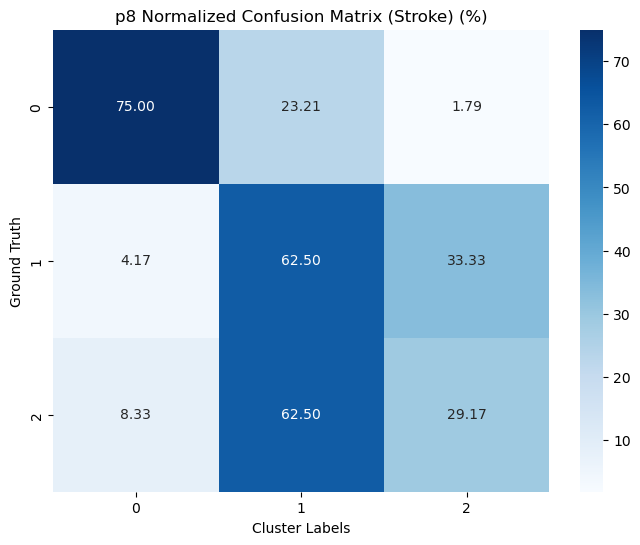

In [88]:
case_id = 'p8'
df_case = df_patient[df_patient.subject_id==case_id]
conf_matrix = confusion_matrix(df_case['gt'], df_case['cluster'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Confusion Matrix Heatmap (Stroke)')
plt.show()

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Normalized Confusion Matrix (Stroke) (%)')
plt.show()

## P4

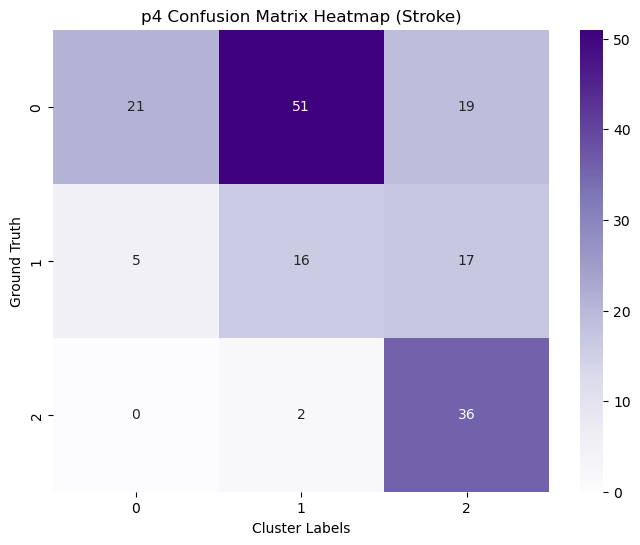

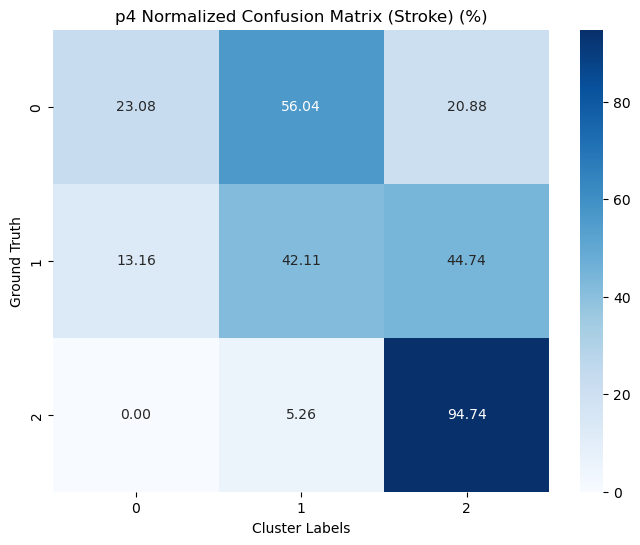

In [89]:
case_id = 'p4'
df_case = df_patient[df_patient.subject_id==case_id]
conf_matrix = confusion_matrix(df_case['gt'], df_case['cluster'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Confusion Matrix Heatmap (Stroke)')
plt.show()

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Normalized Confusion Matrix (Stroke) (%)')
plt.show()

## P3

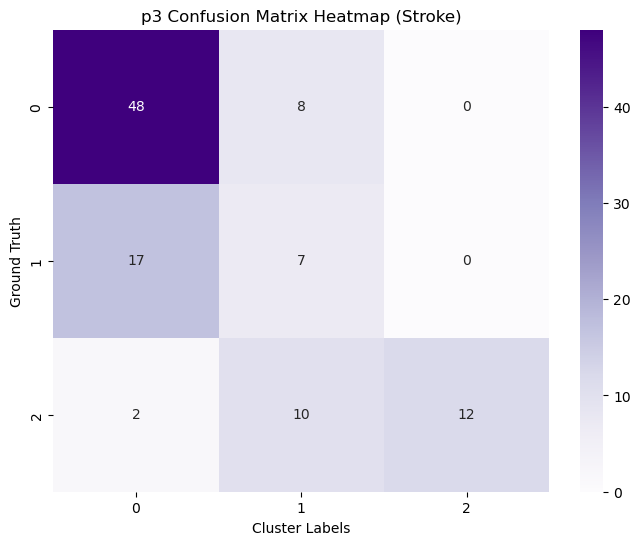

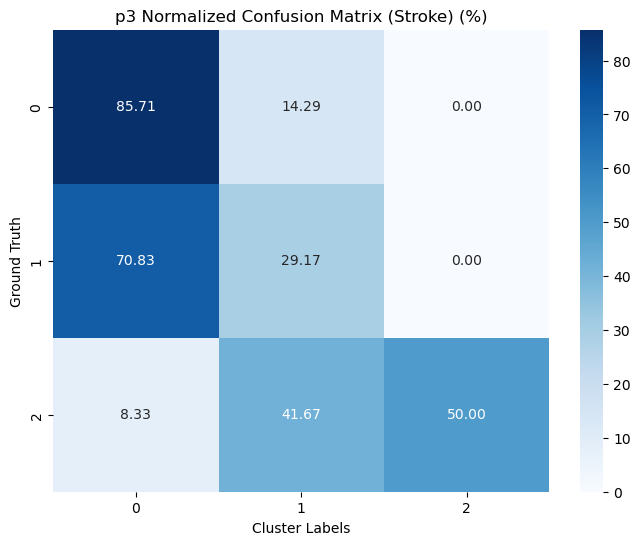

In [90]:
case_id = 'p3'
df_case = df_patient[df_patient.subject_id==case_id]
conf_matrix = confusion_matrix(df_case['gt'], df_case['cluster'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Confusion Matrix Heatmap (Stroke)')
plt.show()

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Cluster Labels')
plt.ylabel('Ground Truth')
plt.title(case_id + ' Normalized Confusion Matrix (Stroke) (%)')
plt.show()

metric exploration

In [26]:
metrics = ['euclidean', 'cityblock', 'mahalanobis', 'minkowski', 'chebyshev']#, 'pearson']
results = {}
VI = np.linalg.inv(np.cov(X.T))

for metric in metrics:
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    
    if metric == 'mahalanobis':
        distances = cdist(X, kmeans.cluster_centers_, metric=metric, VI=VI)
    elif metric == 'minkowski':
        p = 3
        distances = cdist(X, kmeans.cluster_centers_, metric=metric, p=p)
    elif metric == 'pearson':
        distances = np.zeros((X.shape[0], len(kmeans.cluster_centers_)))

        # Iterate over each cluster center
        for i, center in enumerate(kmeans.cluster_centers_):
            # Compute Pearson correlation with each row (data point) in X
            for j in range(X.shape[0]):
                # Pearson correlation for each data point with the center
                correlation = np.corrcoef(X[j, :], center)[0, 1]  # Compute correlation for each sample
                distances[j, i] = 1 - correlation  # Convert to distance

    else:
        distances = cdist(X, kmeans.cluster_centers_, metric=metric)
    results[metric] = silhouette_score(X, kmeans.labels_, metric=metric)

print(results)

{'euclidean': 0.4169942218230056, 'cityblock': 0.4299489860363396, 'mahalanobis': 0.2167947460440239, 'minkowski': 0.41699422182300566, 'chebyshev': 0.3671843712821104}


In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, correlation
import matplotlib.pyplot as plt
import numpy as np


true_labels = df_healthy['gt'].to_numpy()

# Initialize the results dictionary
results = {}

# Define the list of distance metrics to evaluate
metrics = ['euclidean', 'cityblock', 'mahalanobis', 'minkowski', 'chebyshev', 'pearson']


for metric in metrics:
    if metric == 'pearson':
        # Custom handling for Pearson distance metric
        # Pearson distance is 1 - Pearson correlation coefficient
        # We will use cdist to calculate this
        def pearson_distance(X, centers):
            # Pearson distance is 1 - Pearson correlation coefficient
            return cdist(X, centers, metric='correlation')

        # Fit KMeans model with custom distance for Pearson
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans.fit(X)
        distances = pearson_distance(X, kmeans.cluster_centers_)
        predicted_labels = np.argmin(distances, axis=1)
    else:
        # For other metrics, just use KMeans with the standard metric
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans.fit(X)
        predicted_labels = kmeans.labels_

    # Compute clustering evaluations
    silhouette = silhouette_score(X, predicted_labels, metric=metric if metric != 'pearson' else 'correlation')
    davies_bouldin = davies_bouldin_score(X, predicted_labels)
    inertia = kmeans.inertia_

    # Compute ARI and NMI with respect to the ground truth
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)

    # Store results for each metric
    results[metric] = {
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'inertia': inertia,
        'ari': ari,
        'nmi': nmi
    }

    # # Optional: Visualize clustering (PCA for 2D projection)
    # pca = PCA(n_components=2)
    # pca_components = pca.fit_transform(X)
    # plt.figure(figsize=(8, 6))
    # plt.scatter(pca_components[:, 0], pca_components[:, 1], c=predicted_labels, cmap='viridis')
    # plt.title(f'Clustering Visualization - Metric: {metric}')
    # plt.colorbar()
    # plt.show()

# Print results for all metrics
for metric, metrics_results in results.items():
    print(f"Results for {metric} metric:")
    for score, value in metrics_results.items():
        print(f"  {score}: {value}")
    print('-' * 50)

Results for euclidean metric:
  silhouette: 0.4169942218230056
  davies_bouldin: 1.4208634571847478
  inertia: 57.90864910020274
  ari: 0.7152342254778201
  nmi: 0.5925445346479694
--------------------------------------------------
Results for cityblock metric:
  silhouette: 0.4299489860363396
  davies_bouldin: 1.4208634571847478
  inertia: 57.90864910020274
  ari: 0.7152342254778201
  nmi: 0.5925445346479694
--------------------------------------------------
Results for mahalanobis metric:
  silhouette: 0.2167947460440239
  davies_bouldin: 1.4208634571847478
  inertia: 57.90864910020274
  ari: 0.7152342254778201
  nmi: 0.5925445346479694
--------------------------------------------------
Results for minkowski metric:
  silhouette: 0.41699422182300566
  davies_bouldin: 1.4208634571847478
  inertia: 57.90864910020273
  ari: 0.7152342254778201
  nmi: 0.5925445346479694
--------------------------------------------------
Results for chebyshev metric:
  silhouette: 0.3671843712821104
  davi

# explore 200  hz data